In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('test_scores.csv')

In [3]:
df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_student,2133.0,22.796531,4.228893,14.0,20.0,22.0,27.0,31.0
pretest,2133.0,54.955931,13.563101,22.0,44.0,56.0,65.0,93.0
posttest,2133.0,67.102203,13.986789,32.0,56.0,68.0,77.0,100.0


In [5]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

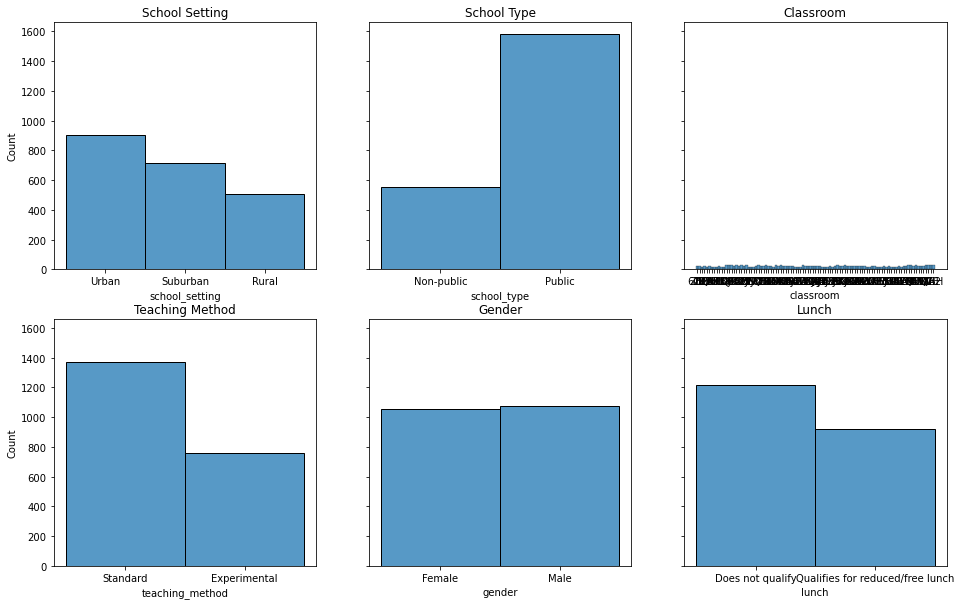

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharey=True)

sns.histplot(ax=axes[0][0], x=df["school_setting"])
axes[0][0].set_title("School Setting")

sns.histplot(ax=axes[0][1], x=df["school_type"])
axes[0][1].set_title("School Type")

sns.histplot(ax=axes[0][2], x=df["classroom"])
axes[0][2].set_title("Classroom")

sns.histplot(ax=axes[1][0], x=df["teaching_method"])
axes[1][0].set_title("Teaching Method")

sns.histplot(ax=axes[1][1], x=df["gender"])
axes[1][1].set_title("Gender")

sns.histplot(ax=axes[1][2], x=df["lunch"])
axes[1][2].set_title("Lunch")

plt.show()

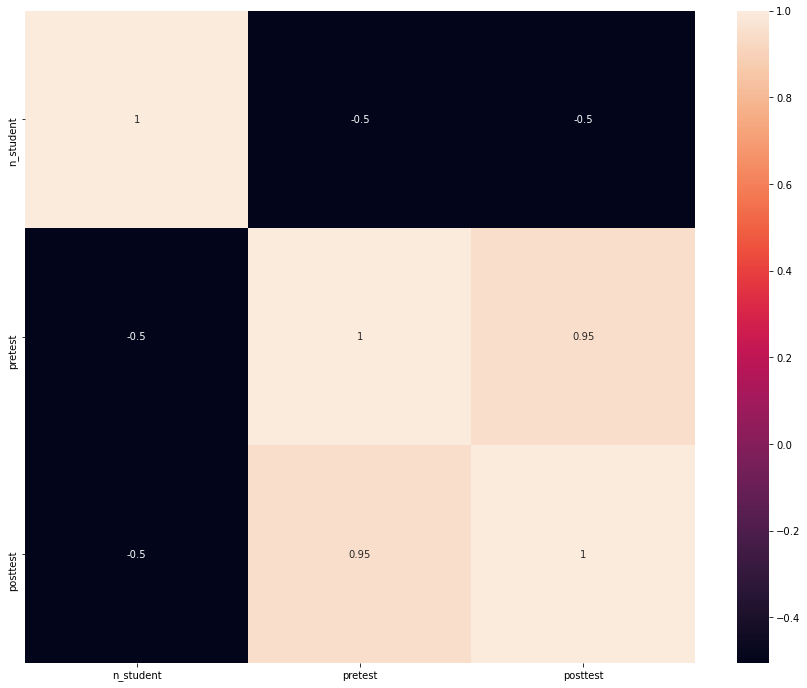

In [7]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

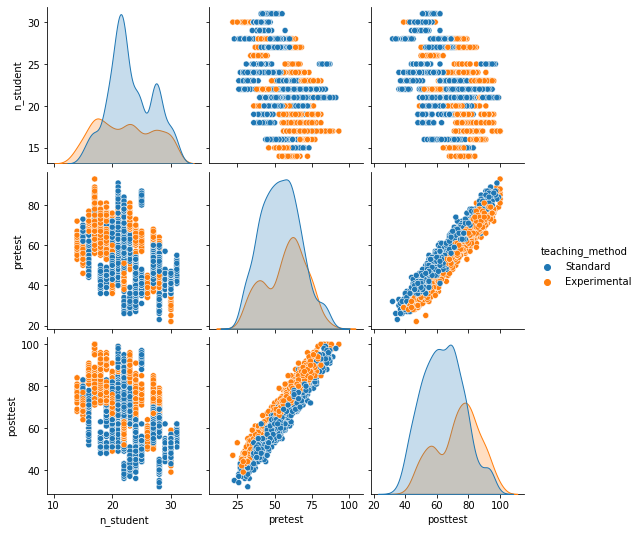

In [8]:
sns.pairplot(df,hue='teaching_method')

In [9]:
data = df.copy()
fields = ["school", "school_setting", "school_type", "teaching_method", "n_student", "lunch"]

In [10]:
from sklearn.preprocessing import LabelEncoder
for i in fields:
    enc = LabelEncoder()
    data[i] = enc.fit_transform(data[i])

In [11]:
data = data.drop(columns=["classroom", "student_id", "gender"])

In [12]:
data

,school,school_setting,school_type,teaching_method,n_student,lunch,pretest,posttest
0,0,2,0,1,6,0,62.0,72.0
1,0,2,0,1,6,0,66.0,79.0
2,0,2,0,1,6,0,64.0,76.0
3,0,2,0,1,6,0,61.0,77.0
4,0,2,0,1,6,0,64.0,76.0
...,...,...,...,...,...,...,...,...
2128,22,2,1,1,16,0,39.0,55.0
2129,22,2,1,1,16,1,38.0,46.0
2130,22,2,1,1,16,1,45.0,51.0
2131,22,2,1,1,16,1,46.0,53.0


In [13]:
X = data.drop(columns=["posttest"])
y = data["posttest"]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVR(gamma="scale")
svc = GridSearchCV(svc, parameters, cv=5)
svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
linear_model.score(X_test, y_test)

0.9401014319648658

In [18]:
from sklearn import metrics

In [19]:
#Logistic Regression gives the best accuracy.
print('MAE:', metrics.mean_absolute_error(y_test, linear_model.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, linear_model.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_model.predict(X_test))))
print('R^2:', metrics.r2_score(y_test, svc.predict(X_test)))

MAE: 2.622832212470867
MSE: 11.07773556292864
RMSE: 3.328323235944586
R^2: 0.9400239556037949
